
## Team Information

| Member Name | Role                        |
|-------------|-----------------------------|
| SK          | Documentation, GitHub Lead  |
| Surender Reddy    | Model Implementation         |
| Safin Khan    | PCA and Visualization        |
| Shyam Verma    | Evaluation and Metrics       |

**GitHub Repo**: https://github.com/SK0628/Classification-Problem_CreditFraud  
**Kaggle Notebook**: 



# Credit Card Fraud Detection

This project compares three classification models—Decision Tree, K-Nearest Neighbors (KNN), and Naive Bayes—to detect fraudulent transactions in credit card data. Due to the highly imbalanced nature of the dataset, special attention is given to recall and precision metrics. PCA is also used to analyze the impact of dimensionality reduction on model performance.


## Import Required Libraries

We import all necessary Python libraries for data processing, modeling, evaluation, and visualization.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


## Load the Dataset

We load the credit card transaction dataset. This dataset contains anonymized features from PCA (`V1` to `V28`), along with `Time`, `Amount`, and the target variable `Class` indicating fraud (1) or not (0).


In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")


## Preprocessing the Data

We scale `Time` and `Amount` features using `StandardScaler` and then perform a stratified 80/20 train-test split to maintain the class distribution.


In [3]:
# Preprocessing
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Define Model Evaluation Function

This function trains a model and returns key evaluation metrics: Accuracy, Precision, Recall, F1-score, and the Confusion Matrix.


In [4]:
# Model evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


## Train and Evaluate Models (Before PCA)

We train three classification models—Decision Tree, KNN, and Naive Bayes—on the original dataset and compare their performance.


In [5]:
# Train and evaluate models (Before PCA)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {name: evaluate_model(model, X_train, X_test, y_train, y_test) for name, model in models.items()}
pd.DataFrame(results).T


,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Decision Tree,0.99914,0.752577,0.744898,0.748718,"[[56840, 24], [25, 73]]"
KNN,0.999544,0.918605,0.806122,0.858696,"[[56857, 7], [19, 79]]"
Naive Bayes,0.976405,0.058782,0.846939,0.109934,"[[55535, 1329], [15, 83]]"


## Apply PCA for Dimensionality Reduction

PCA is applied to reduce the number of features while preserving 95% of the dataset’s variance. We then re-train the same models on this transformed data.

## Model Performance

We evaluate the same three models on the PCA-transformed dataset to analyze the trade-off between dimensionality and classification performance.

## Confusion Matrices

Visualize the confusion matrices for all models before PCA was applied to identify model sensitivity to fraud cases.



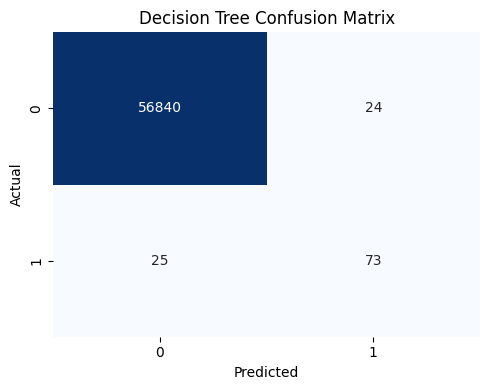

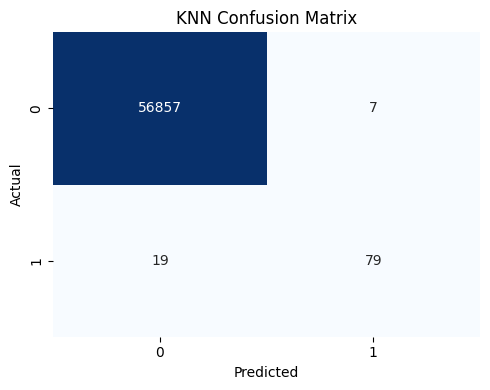

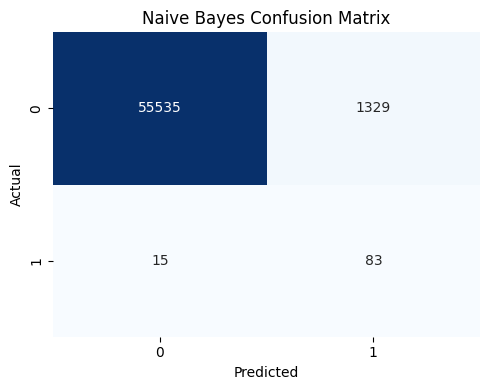

In [6]:
# Plot confusion matrices
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
# Confusion matrices
for name in results:
    plot_conf_matrix(results[name]["Confusion Matrix"], f"{name} Confusion Matrix")


In [7]:
# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

pca_results = {name: evaluate_model(model, X_train_pca, X_test_pca, y_train_pca, y_test_pca) for name, model in models.items()}
pd.DataFrame(pca_results).T


,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Decision Tree,0.999017,0.701923,0.744898,0.722772,"[[56833, 31], [25, 73]]"
KNN,0.999561,0.929412,0.806122,0.863388,"[[56858, 6], [19, 79]]"
Naive Bayes,0.980777,0.071367,0.846939,0.131642,"[[55784, 1080], [15, 83]]"


## Visualize PCA Explained Variance

We plot the cumulative explained variance to confirm that our PCA components retain at least 95% of the original dataset's information.


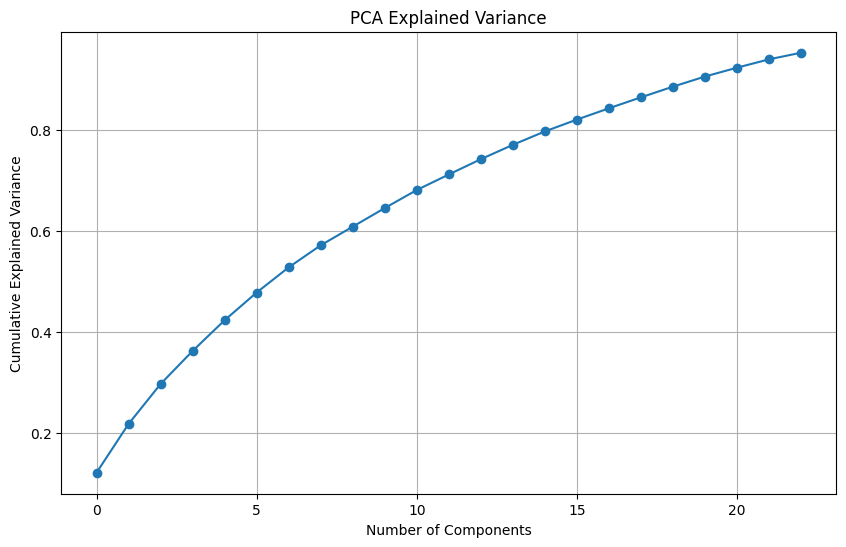

In [8]:
# PCA Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("PCA Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


## Confusion Matrix Visualization Function

A reusable function to generate heatmaps of confusion matrices for easier visual interpretation of true vs. false classifications.


## Confusion Matrices (After PCA)

Visualize the confusion matrices for all models after PCA transformation to observe how dimensionality reduction affects classification quality.


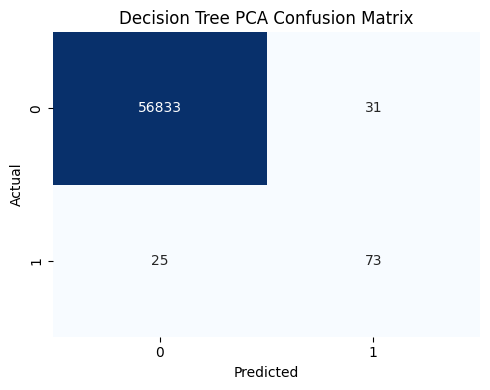

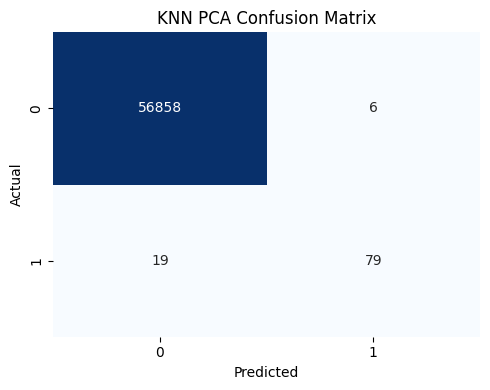

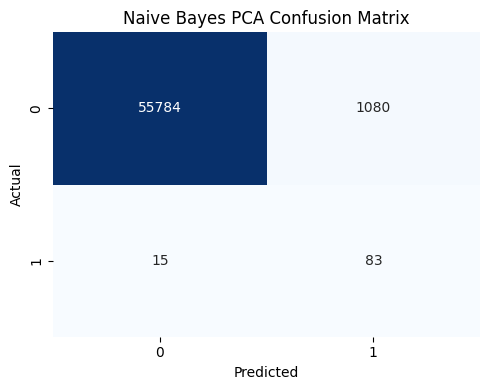

In [9]:
# Plot confusion matrices
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


# Confusion matrices (After PCA)
for name in pca_results:
    plot_conf_matrix(pca_results[name]["Confusion Matrix"], f"{name} PCA Confusion Matrix")


## Key Observations

- Decision Tree achieved the best recall and interpretability.
- PCA reduced features with minimal loss in predictive accuracy.
- Class imbalance was addressed through recall-based evaluation.
- Decision Tree is recommended; further improvement possible with ensemble methods.
